In [1]:
import numpy as np
import matplotlib.pyplot as plt
import adaptivealgo.cli.policy_iter as pi
import adaptivealgo.cli.simulate_policy as sim
from adaptivealgo.lib.simulator import Simulator

In [2]:
n_links = 4
f_thresh = 0.5
actions = [0.1, 0.2, 0.3, 0.4, 0.5]
alpha = 1.0
gamma = 0.1
tol = 1e-6

n_episodes = 100_000

policy, i = pi.find_policy(n_links, f_thresh, actions, alpha, gamma, tol)
print(f"Policy iteration took {i} iterations")

simulator = Simulator(policy["policy"], n_links, f_thresh, actions, alpha, gamma)
samples = sim.gen_policy_samples(simulator, n_episodes)
print(f"Mean runtime: {int(np.mean(samples))} steps")

Policy iteration took 3 iterations
Mean runtime: 30 steps


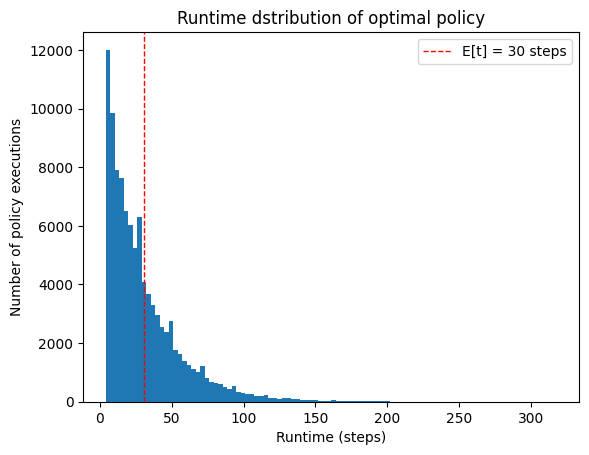

In [3]:
plt.hist(samples, bins=100)
plt.axvline(np.mean(samples), color='r', linestyle='--', linewidth=1)
plt.title('Runtime dstribution of optimal policy')
plt.xlabel('Runtime (steps)')
plt.ylabel('Number of policy executions')
plt.legend([f'E[t] = {int(np.mean(samples))} steps'])
plt.show()

In [4]:
policies = []

for n_links in range(2, 6):
    policy, i = pi.find_policy(n_links, f_thresh, actions, alpha, gamma, tol)
    print(f"Policy iteration for {n_links} required links took {i} iterations")
    policies.append(policy)

Policy iteration for 2 required links took 2 iterations
Policy iteration for 3 required links took 3 iterations
Policy iteration for 4 required links took 3 iterations
Policy iteration for 5 required links took 4 iterations


In [5]:
opt_means = []
opt_stds = []
n_episodes = 10_000

for policy in policies:
    simulator = Simulator(policy["policy"], policy['n_links'], policy['f_thresh'], policy['actions'], policy['alpha'], policy['gamma'])
    samples = sim.gen_policy_samples(simulator, n_episodes)
    print(f"Mean runtime for {policy['n_links']} required links: {int(np.mean(samples))} steps")

    opt_means.append(np.mean(samples))
    opt_stds.append(np.std(samples))

Mean runtime for 2 required links: 6 steps
Mean runtime for 3 required links: 13 steps
Mean runtime for 4 required links: 30 steps
Mean runtime for 5 required links: 91 steps


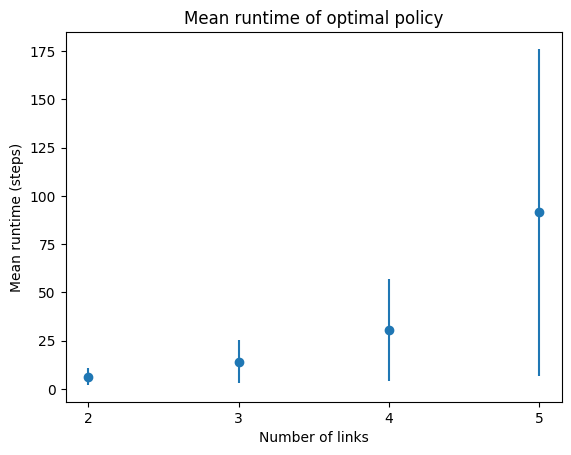

In [6]:
plt.errorbar(range(2, 6), opt_means, yerr=opt_stds, fmt='o')
plt.title('Mean runtime of optimal policy')
plt.xlabel('Number of links')
plt.xticks(range(2, 6))
plt.ylabel('Mean runtime (steps)')
plt.show()

Mean runtime for 5 required links: 92 steps
Mean runtime for 5 required links: 90 steps
Mean runtime for 5 required links: 91 steps
Mean runtime for 5 required links: 90 steps
Mean runtime for 5 required links: 91 steps
Mean runtime for 5 required links: 91 steps
Mean runtime for 5 required links: 91 steps


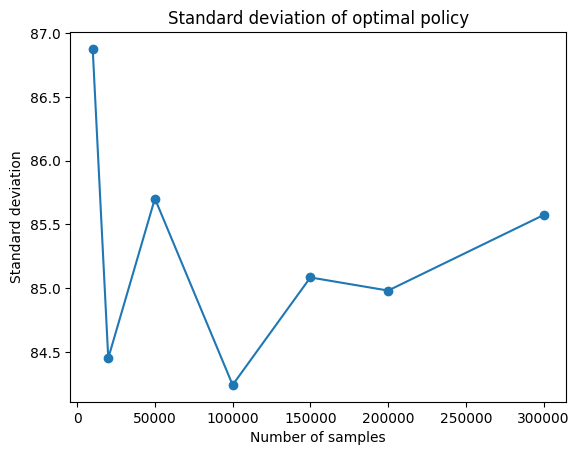

In [7]:
episodes = [10_000, 20_000, 50_000, 100_000, 150_000, 200_000, 300_000]
opt_stds = []

for n_episodes in episodes:
    policy = policies[-1]
    simulator = Simulator(policy["policy"], policy['n_links'], policy['f_thresh'], policy['actions'], policy['alpha'], policy['gamma'])
    samples = sim.gen_policy_samples(simulator, n_episodes)
    print(f"Mean runtime for {policy['n_links']} required links: {int(np.mean(samples))} steps")

    opt_stds.append(np.std(samples))

plt.plot(episodes, opt_stds, 'o-')
plt.title('Standard deviation of optimal policy')
plt.xlabel('Number of samples')
plt.ylabel('Standard deviation')
plt.show()